## 4. Дисбаланс выборки

**Несбалансированная выборка (imbalanced dataset)** — выборка, в которой количество примеров каких-то классов сильно превалирует над количеством примеров других классов. Это определение также можно расширить на другие типы задач. Например, в задаче регрессии дисбалансом выборки будет ситуация, при которой распределение целевых значений будет сильно отличаться от равномерного.

### 4.1. Когда считать выборку несбалансированной?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
!conda update -y --all


Solving environment: done

## Package Plan ##

  environment location: /Users/Oleg/.conda/envs/SkillFactory


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    async_generator-1.10       |     pyhd3eb1b0_0          23 KB
    cffi-1.14.5                |   py39h2125817_0         216 KB
    cryptography-3.4.7         |   py39h2fd3fbb_0         693 KB
    decorator-5.0.6            |     pyhd3eb1b0_0          12 KB
    ecos-2.0.7.post1           |   py39he3068b8_0          90 KB
    importlib-metadata-3.10.0  |   py39hecd8cb5_0          33 KB
    ipyparallel-6.3.0          |   py39hecd8cb5_0         313 KB
    ipython-7.22.0             |   py39h01d92e1_0         996 KB
    jedi-0.17.2                |   py39hecd8cb5_1         921 KB
    jupyter_core-4.7.1         |   py39hecd8cb5_0          68 KB
    kiwisolver-1.3.1           |   py39h23ab428_0          53 KB
    lxml-4.6.3                 

pluggy-0.13.1        | 33 KB     | ##################################### | 100% 
cffi-1.14.5          | 216 KB    | ##################################### | 100% 
kiwisolver-1.3.1     | 53 KB     | ##################################### | 100% 
nbclient-0.5.3       | 62 KB     | ##################################### | 100% 
cryptography-3.4.7   | 693 KB    | ##################################### | 100% 
lxml-4.6.3           | 1.2 MB    | ##################################### | 100% 
nest-asyncio-1.5.1   | 10 KB     | ##################################### | 100% 
pytest-6.2.3         | 428 KB    | ##################################### | 100% 
jedi-0.17.2          | 921 KB    | ##################################### | 100% 
pip-21.0.1           | 1.8 MB    | ##################################### | 100% 
ipython-7.22.0       | 996 KB    | ##################################### | 100% 
notebook-6.3.0       | 4.1 MB    | ##################################### | 100% 
scipy-1.6.2          | 14.7 

In [2]:
!ls -la ../data

total 264
drwxr-xr-x  5 Oleg  staff     160 May  9 13:09 .
drwxr-xr-x  9 Oleg  staff     288 May  8 22:40 ..
drwxr-xr-x  2 Oleg  staff      64 May  9 13:09 .ipynb_checkpoints
-rw-r--r--@ 1 Oleg  staff  107839 May  8 22:39 M7.7_Практика.ipynb
-rw-r--r--@ 1 Oleg  staff   24418 May  9 13:08 M7.9_Практика.ipynb


In [0]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


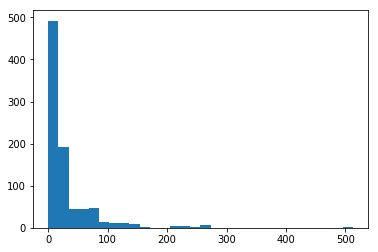

In [0]:
plt.hist(titanic['Fare'], bins=30);

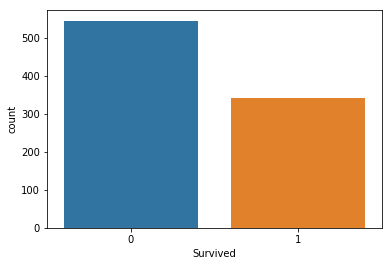

In [0]:
sns.countplot(x='Survived', data=titanic)

Нет точного определения, когда считать выборку несбалансированной. Неформально считается, что выборка несбалансированна, когда отношение количества преобладающего и минорного классов составляет 10:1.

### 4.2. Последствия дисбаланса данных

Что происходит при дисбалансе классов:
1. У алгоритма появляется склонность к более популярным классам/значениям.
1. Невозможность использования метрик, не учитывающих веса классов (базовая метрика accuracy, изученная выше, не может быть использована).

### 4.3. Решение проблемы

1. Изменить целевую метрику — в задачах классификации confusion matrix, precision, recall, F1-score, ROC-кривые будут намного корректнее описывать алгоритм, чем accuracy.
1. Изменить выборку данных: 1) oversampling — увеличение кол-ва объектов классов-меньшинств; 2) undersampling — сокращение кол-ва объектов превалирующих классов.
1. Добавить штраф в оптимизационный функционал, прямо пропорциональный кол-ву объектов каждого класса (веса классов).
1. Возможно, есть смысл перейти к задачам [Anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection) и [Change detection](https://en.wikipedia.org/wiki/Change_detection).

Во 2-м способе решение проблемы oversampling может быть выполнено как простым дублированием примеров меньшего класса, так и и более сложной техникой, называемой "аугментацией выборки".

**Аугментация выборки (data augmentation)** — процесс генерации примеров из исходных путем их модификации. Примерами аугментации данных могут служить: повороты, масштабирование изображений, применение фильтров; для текста может быть незначительно изменен контекст и изменено склонение/спряжение слов.

Еще одна техника, которая может быть использована для oversampling это **обогащение данных**. При использовании этой техники данные находятся во внешних дополнительных источниках. Например, если банк решает свою скоринговую задачу, он может также расширить свой набор данных данными другого банка при их наличии.